In [2]:
import pandas as pd

In [3]:
vec = pd.read_table('output/pca/plink/h3a_wgs.eigenvec', header=None, sep='\s+', engine='python')
vec.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,H3A-7C44F2,H3A-7C44F2,-0.034223,0.058752,0.093592,0.009723,-0.043088,0.000323,-0.005085,0.050255,...,-0.085323,-0.043453,0.011542,-0.056800,-0.004629,-0.024886,-0.081536,-0.113551,0.091701,0.098972
1,H3A-B4DD3C,H3A-B4DD3C,-0.025685,0.064412,0.067200,0.006859,-0.007061,0.015771,-0.018522,0.026546,...,0.001353,-0.028462,-0.041034,-0.039860,-0.000918,0.058257,-0.006358,0.030699,-0.002782,-0.044072
2,H3A-31F23C,H3A-31F23C,-0.063886,-0.024561,0.046533,-0.090492,0.007689,-0.028224,-0.043380,-0.055852,...,0.009442,-0.005870,0.007242,-0.034950,0.005484,-0.035543,0.089054,-0.057643,-0.070711,-0.010556
3,H3A-D3A6FE,H3A-D3A6FE,-0.146803,-0.018440,-0.057242,0.033928,0.032195,-0.010065,0.013168,-0.013795,...,0.016108,-0.024910,-0.007408,0.000470,0.016086,0.013339,-0.001661,0.036067,-0.019752,0.009181
4,H3A-0BF47F,H3A-0BF47F,-0.037333,0.059711,0.103281,0.022483,-0.079042,0.026247,0.006138,0.093322,...,-0.050618,-0.136568,0.126337,0.025698,-0.098284,-0.012412,-0.039049,0.212650,0.143699,-0.239268


In [4]:
meta = pd.read_table('/data/vcf/h3awgs/samples.meta.tsv', index_col='SampleID')
meta.head()

,Country,EthnolinguisticGroup,Gender,PI,Project,sourcefile
SampleID,,,,,,
H3A-7C44F2,Guinea,Guinea,Female,Fowler,Trypanogen,Trypanogen.tsv
H3A-B4DD3C,Cote D'Ivoire,Cote D'Ivoire,Male,Fowler,Trypanogen,Trypanogen.tsv
H3A-31F23C,Uganda,Uganda,Female,Fowler,Trypanogen,Trypanogen.tsv
H3A-D3A6FE,Uganda,Uganda,Female,Fowler,Trypanogen,Trypanogen.tsv
H3A-0BF47F,Guinea,Guinea,Male,Fowler,Trypanogen,Trypanogen.tsv


In [5]:
vec[['Country', 'EthnolinguisticGroup']] = meta[['Country', "EthnolinguisticGroup"]].values
vec.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,Country,EthnolinguisticGroup
0,H3A-7C44F2,H3A-7C44F2,-0.034223,0.058752,0.093592,0.009723,-0.043088,0.000323,-0.005085,0.050255,...,0.011542,-0.056800,-0.004629,-0.024886,-0.081536,-0.113551,0.091701,0.098972,Guinea,Guinea
1,H3A-B4DD3C,H3A-B4DD3C,-0.025685,0.064412,0.067200,0.006859,-0.007061,0.015771,-0.018522,0.026546,...,-0.041034,-0.039860,-0.000918,0.058257,-0.006358,0.030699,-0.002782,-0.044072,Cote D'Ivoire,Cote D'Ivoire
2,H3A-31F23C,H3A-31F23C,-0.063886,-0.024561,0.046533,-0.090492,0.007689,-0.028224,-0.043380,-0.055852,...,0.007242,-0.034950,0.005484,-0.035543,0.089054,-0.057643,-0.070711,-0.010556,Uganda,Uganda
3,H3A-D3A6FE,H3A-D3A6FE,-0.146803,-0.018440,-0.057242,0.033928,0.032195,-0.010065,0.013168,-0.013795,...,-0.007408,0.000470,0.016086,0.013339,-0.001661,0.036067,-0.019752,0.009181,Uganda,Uganda
4,H3A-0BF47F,H3A-0BF47F,-0.037333,0.059711,0.103281,0.022483,-0.079042,0.026247,0.006138,0.093322,...,0.126337,0.025698,-0.098284,-0.012412,-0.039049,0.212650,0.143699,-0.239268,Guinea,Guinea


In [25]:
X = pd.DataFrame()
X[[0,1]] = vec.iloc[:,[2,3]]
# X.head()
X = X.to_numpy()
X.shape
# X.head()

(386, 2)

In [20]:
P, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility
P.shape

(500, 2)

For n_clusters = 2 The average silhouette_score is : 0.521489765878391
For n_clusters = 3 The average silhouette_score is : 0.5545822232532934
For n_clusters = 4 The average silhouette_score is : 0.5693108083278022
For n_clusters = 5 The average silhouette_score is : 0.6004544888589507
For n_clusters = 6 The average silhouette_score is : 0.6886826021739427
For n_clusters = 7 The average silhouette_score is : 0.7007477208452552
For n_clusters = 8 The average silhouette_score is : 0.6438544951063032
For n_clusters = 9 The average silhouette_score is : 0.6971900056571115
For n_clusters = 10 The average silhouette_score is : 0.7003354912272834


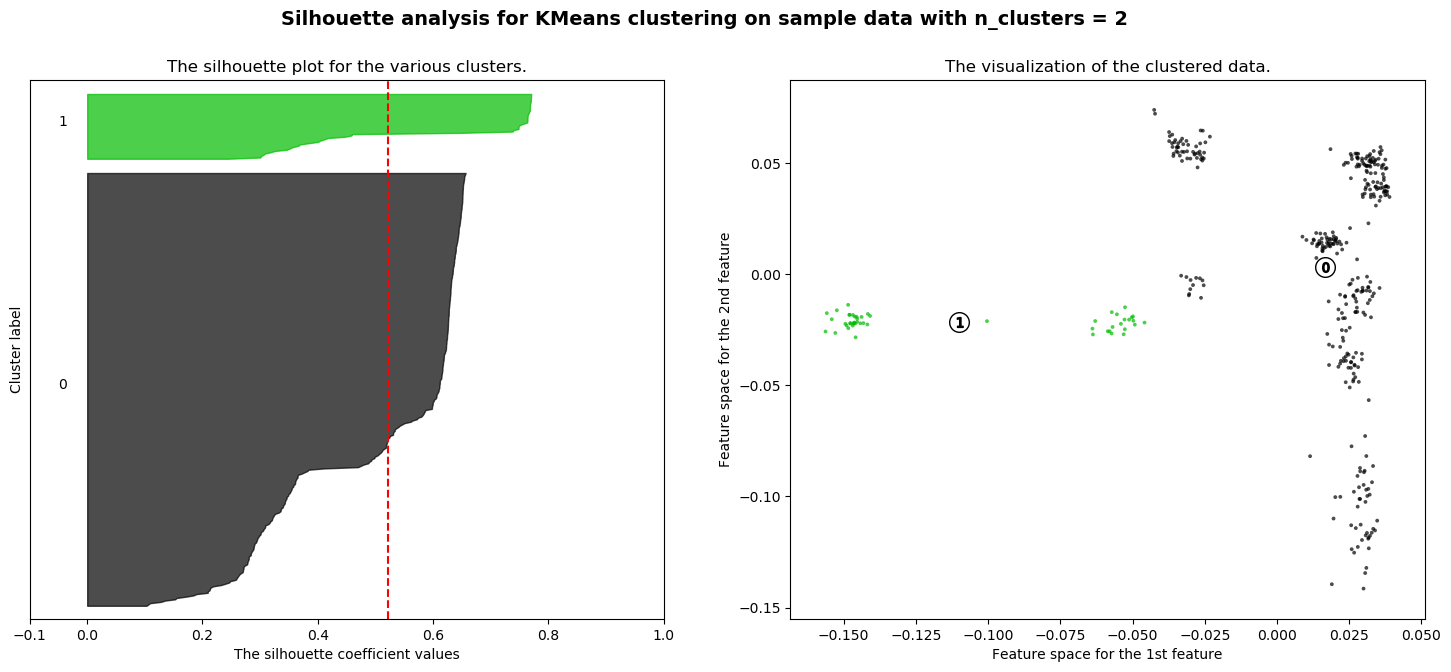

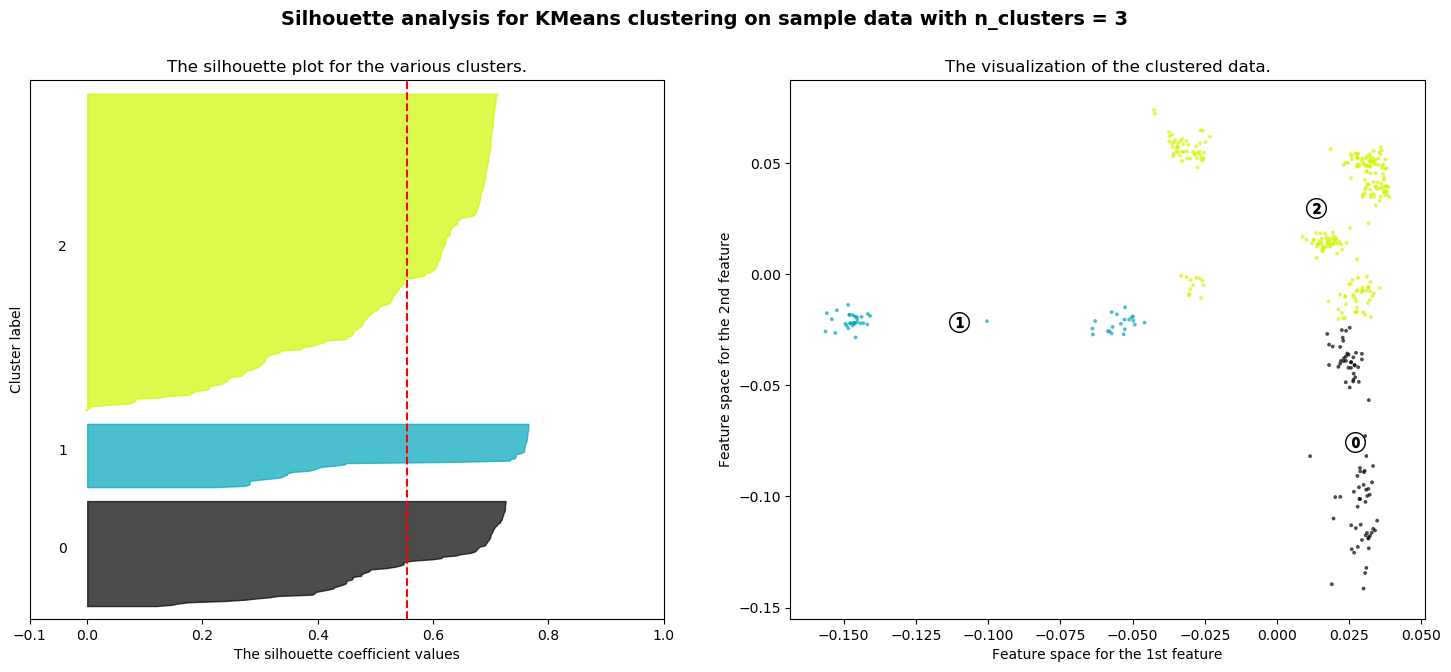

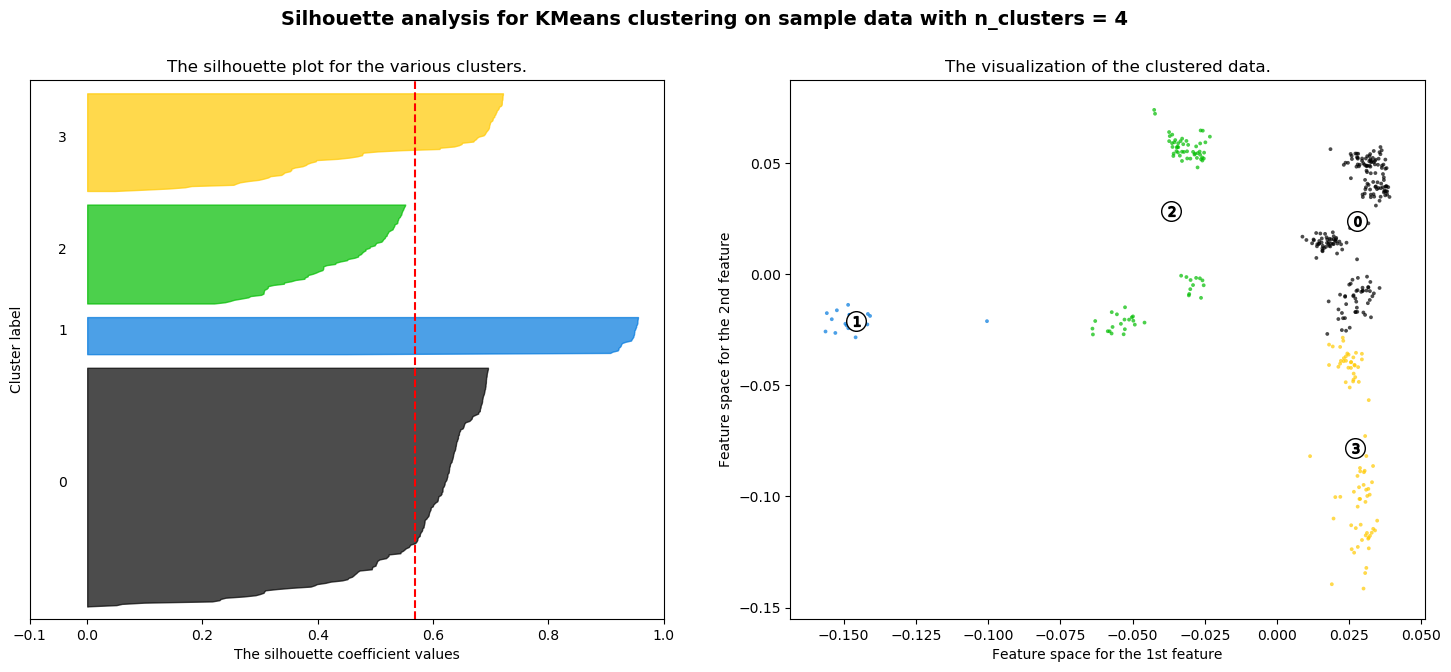

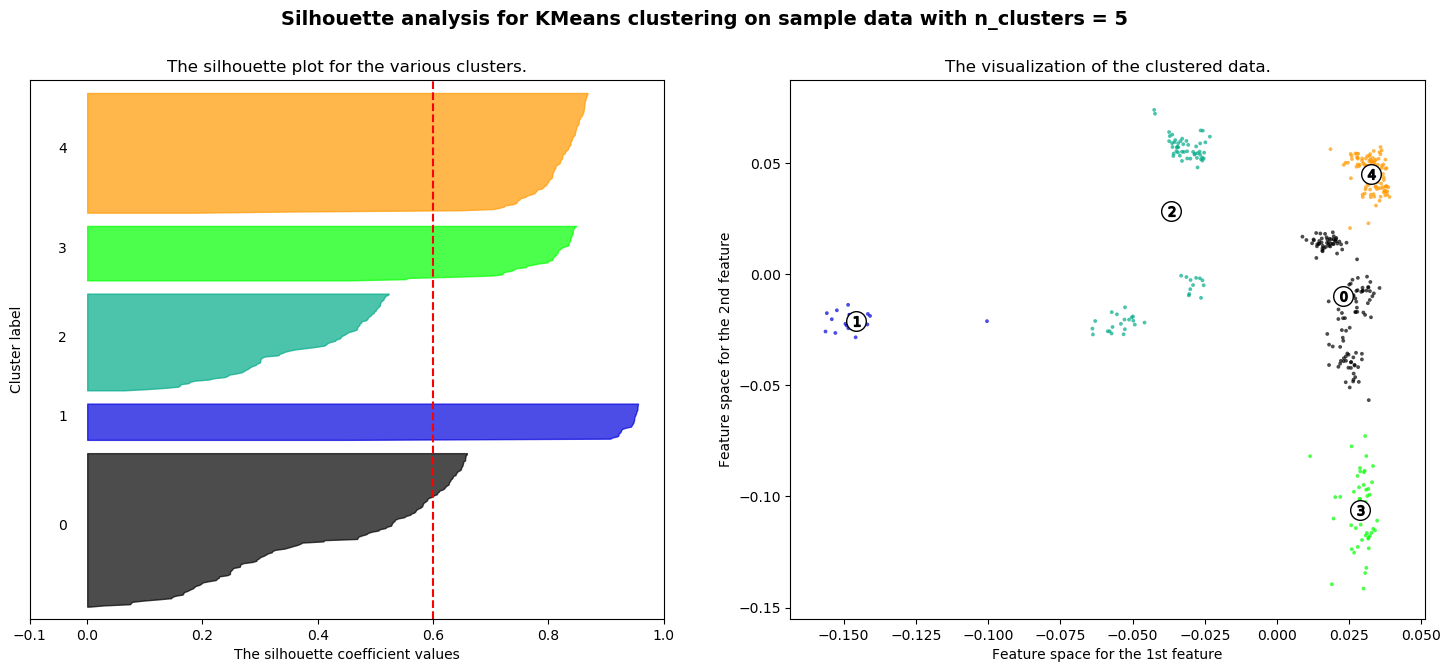

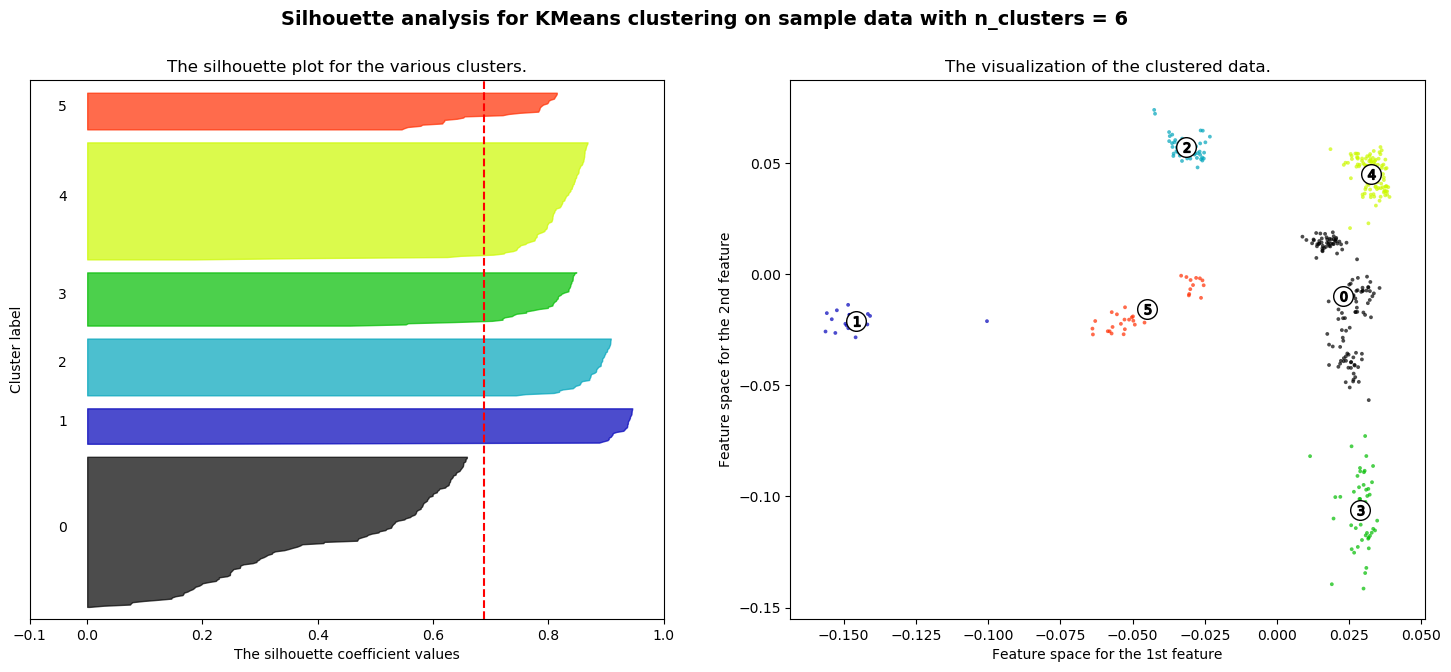

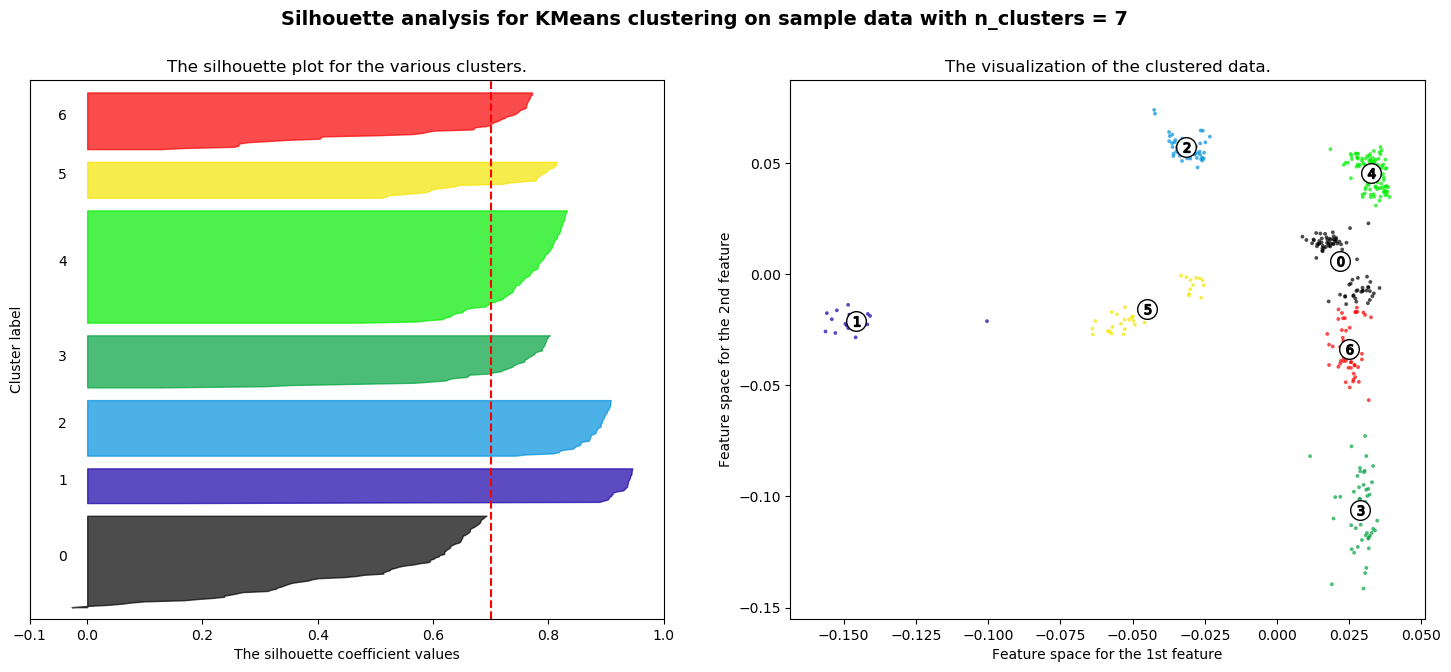

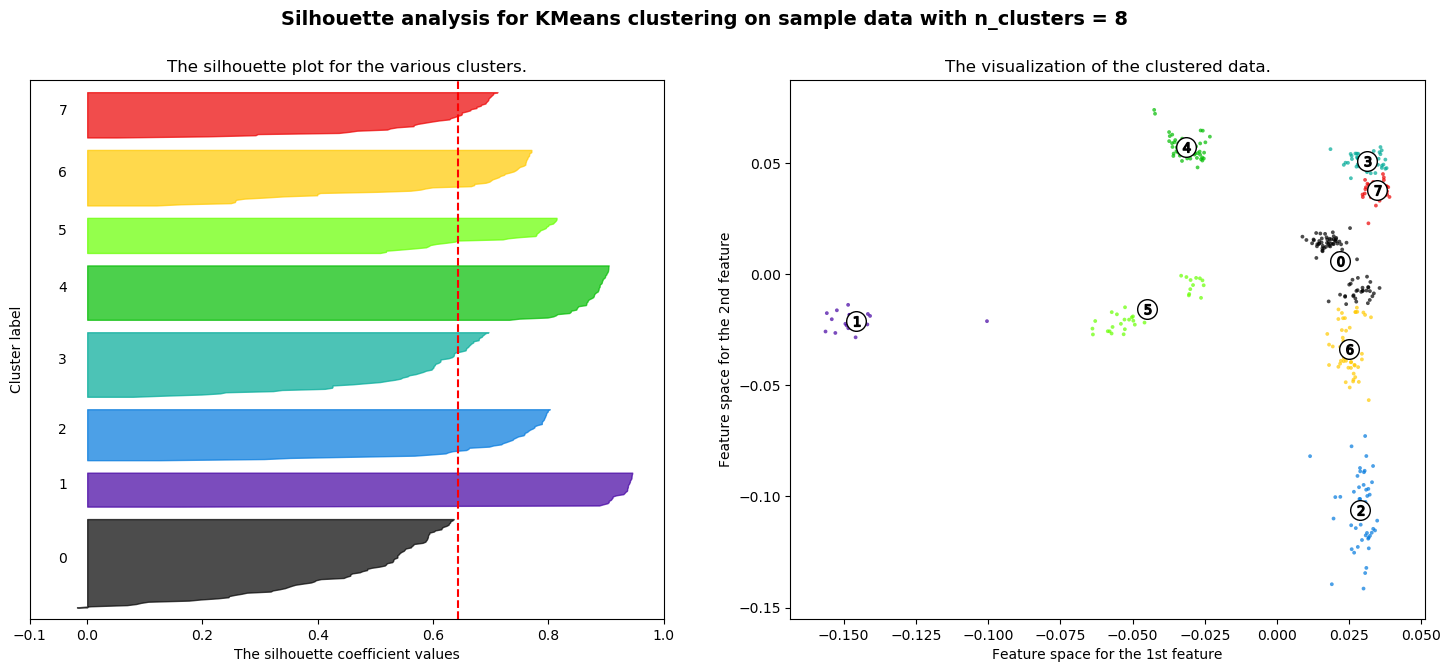

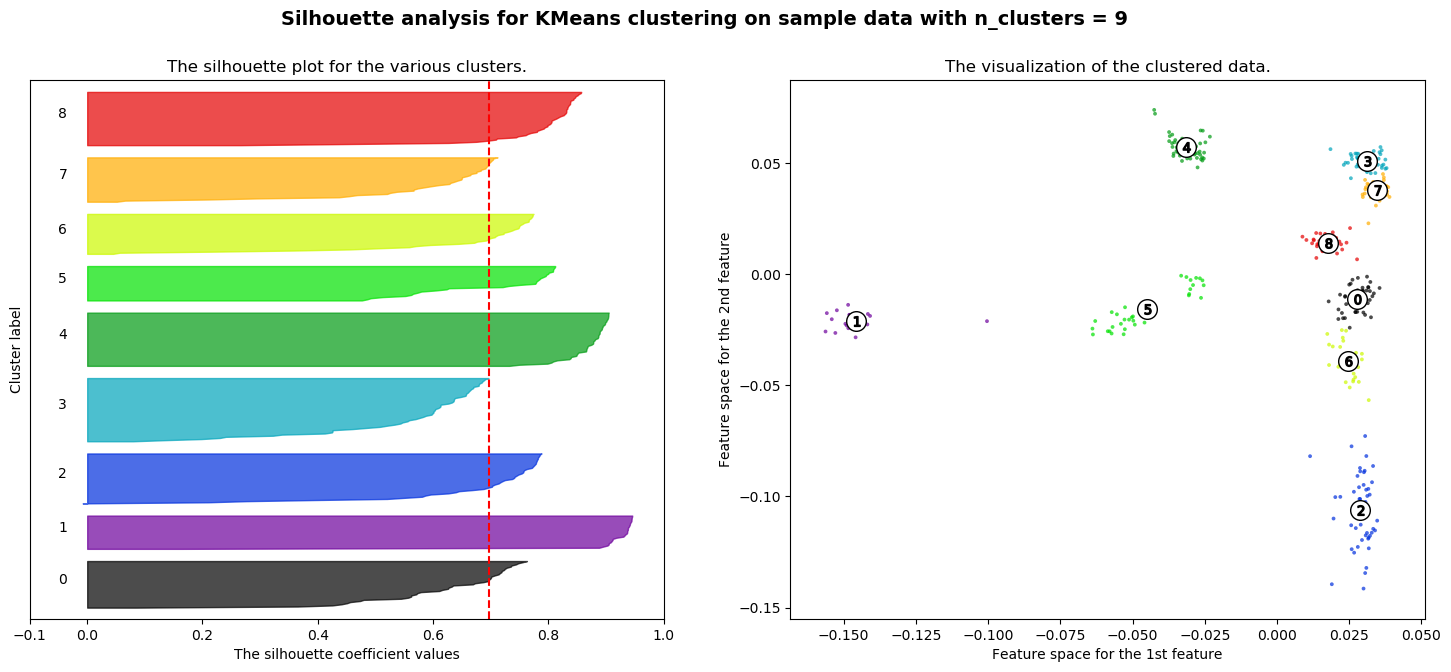

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
# X, y = make_blobs(
#     n_samples=500,
#     n_features=2,
#     centers=4,
#     cluster_std=1,
#     center_box=(-10.0, 10.0),
#     shuffle=True,
#     random_state=1,
# )  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()


/home/wilson/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/wilson/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/wilson/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/wilson/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/wilson/.local/lib/python3.8/si

Text(0.5, 1.0, 'Elbow curve')

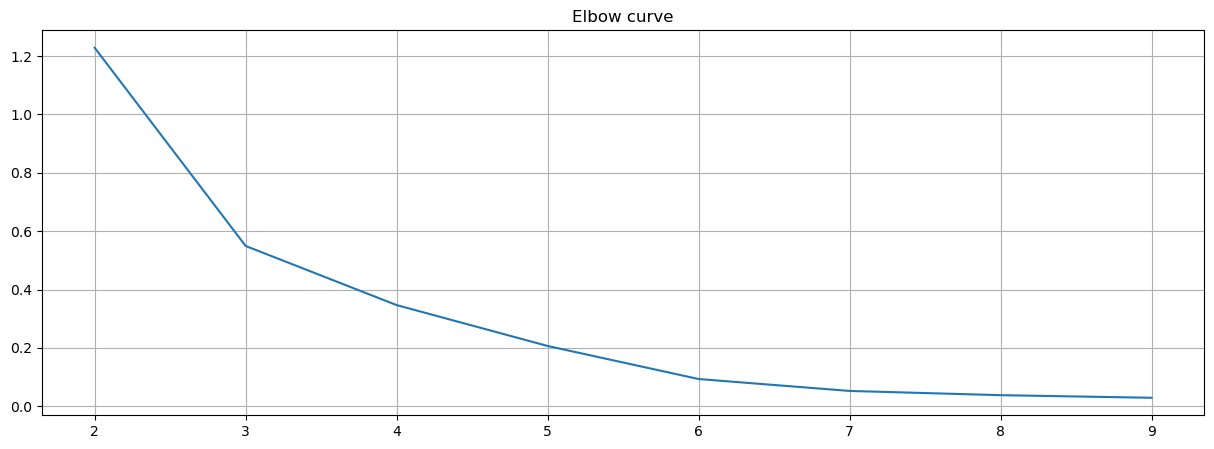

In [30]:
distorsions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), distorsions)
plt.grid(True)
plt.title('Elbow curve')